<a href="https://colab.research.google.com/github/Fatimata01/classification-supervis-e_data_mining/blob/main/Classification_supervis%C3%A9e.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

 **Détection de fraude par carte de crédit-Ensemble de données déséquilibré**



In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [ ]:
data = pd.read_csv("credit_dataset.csv")
data

,Unnamed: 0,ID,GENDER,CAR,REALITY,NO_OF_CHILD,INCOME,INCOME_TYPE,EDUCATION_TYPE,FAMILY_TYPE,HOUSE_TYPE,FLAG_MOBIL,WORK_PHONE,PHONE,E_MAIL,FAMILY SIZE,BEGIN_MONTH,AGE,YEARS_EMPLOYED,TARGET
0,0,5008806,M,Y,Y,0,112500.0,Working,Secondary / secondary special,Married,House / apartment,1,0,0,0,2.0,29,59,3,0
1,1,5008808,F,N,Y,0,270000.0,Commercial associate,Secondary / secondary special,Single / not married,House / apartment,1,0,1,1,1.0,4,52,8,0
2,2,5008809,F,N,Y,0,270000.0,Commercial associate,Secondary / secondary special,Single / not married,House / apartment,1,0,1,1,1.0,26,52,8,0
3,3,5008810,F,N,Y,0,270000.0,Commercial associate,Secondary / secondary special,Single / not married,House / apartment,1,0,1,1,1.0,26,52,8,0
4,4,5008811,F,N,Y,0,270000.0,Commercial associate,Secondary / secondary special,Single / not married,House / apartment,1,0,1,1,1.0,38,52,8,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
25129,25129,5149828,M,Y,Y,0,315000.0,Working,Secondary / secondary special,Married,House / apartment,1,0,0,0,2.0,11,48,7,1
25130,25130,5149834,F,N,Y,0,157500.0,Commercial associate,Higher education,Married,House / apartment,1,0,1,1,2.0,23,34,4,1
25131,25131,5149838,F,N,Y,0,157500.0,Pensioner,Higher education,Married,House / apartment,1,0,1,1,2.0,32,34,4,1
25132,25132,5150049,F,N,Y,0,283500.0,Working,Secondary / secondary special,Married,House / apartment,1,0,0,0,2.0,9,49,2,1


In [ ]:
data.dtypes.value_counts()

int64      11
object      7
float64     2
dtype: int64

In [ ]:
#Analyse de la variable cible DEFAUT

data['TARGET'].value_counts(normalize=True)


0    0.98321
1    0.01679
Name: TARGET, dtype: float64

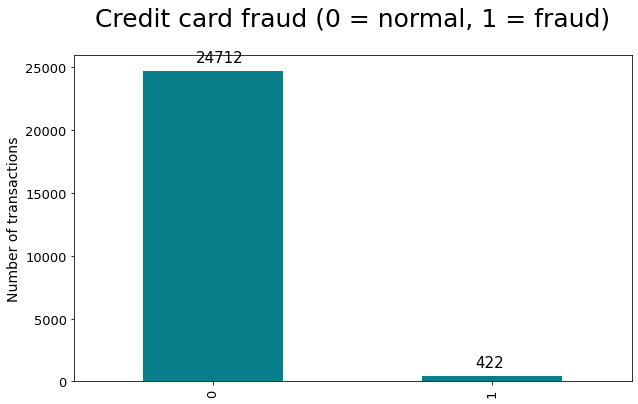

In [ ]:
ax = data['TARGET'].value_counts().plot(kind='bar', figsize=(10, 6), fontsize=13, color='#087E8B')
ax.set_title('Credit card fraud (0 = normal, 1 = fraud)', size=25, pad=30)
ax.set_ylabel('Number of transactions', fontsize=14)

for i in ax.patches:
    ax.text(i.get_x() + 0.19, i.get_height() + 700, str(round(i.get_height(), 2)), fontsize=15)

Seulement **1.68%** des transactions sont des fraudes; contre **98.32%** qui sont des transactions normales. Donc on voit clairement que nos données sont **très déséquilibrées**

In [ ]:
# Drop unnecessary columns
to_drop = ['Unnamed: 0', 'ID','FLAG_MOBIL']
data.drop(to_drop, axis=1, inplace=True)

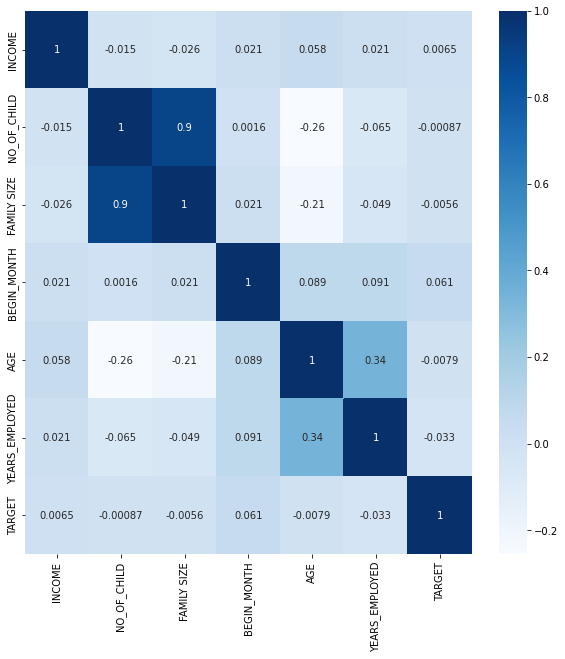

In [ ]:
#Préparation des données
#Matrice de correlation
quanti=['INCOME','NO_OF_CHILD','FAMILY SIZE','BEGIN_MONTH','AGE','YEARS_EMPLOYED','TARGET']
plt.figure(figsize=(10,10))
sns.heatmap(data[quanti].corr(),cmap="Blues",annot=True)
plt.show()

On remarque une **forte correlation de 0.9 entre FAMILY_SIZE et NO_OF_CHILD**.On supprimera donc la variable NO_OF_CHILD.

In [ ]:
data.drop("NO_OF_CHILD", axis=1, inplace=True)

In [ ]:
from sklearn.preprocessing import LabelEncoder

class MultiColumnLabelEncoder:
    def __init__(self,columns = None):
        self.columns = columns # array of column names to encode

    def fit(self,X,y=None):
        return self # not relevant here

    def transform(self,X):
        '''
        Transforms columns of X specified in self.columns using
        LabelEncoder(). If no columns specified, transforms all
        columns in X.
        '''
        output = X.copy()
        if self.columns is not None:
            for col in self.columns:
                output[col] = LabelEncoder().fit_transform(output[col])
        else:
            for colname,col in output.iteritems():
                output[colname] = LabelEncoder().fit_transform(col)
        return output

    def fit_transform(self,X,y=None):
        return self.fit(X,y).transform(X)

In [ ]:
data = MultiColumnLabelEncoder(columns = ['GENDER','CAR','REALITY'	]).fit_transform(data)
data

,GENDER,CAR,REALITY,INCOME,INCOME_TYPE,EDUCATION_TYPE,FAMILY_TYPE,HOUSE_TYPE,WORK_PHONE,PHONE,E_MAIL,FAMILY SIZE,BEGIN_MONTH,AGE,YEARS_EMPLOYED,TARGET
0,1,1,1,112500.0,Working,Secondary / secondary special,Married,House / apartment,0,0,0,2.0,29,59,3,0
1,0,0,1,270000.0,Commercial associate,Secondary / secondary special,Single / not married,House / apartment,0,1,1,1.0,4,52,8,0
2,0,0,1,270000.0,Commercial associate,Secondary / secondary special,Single / not married,House / apartment,0,1,1,1.0,26,52,8,0
3,0,0,1,270000.0,Commercial associate,Secondary / secondary special,Single / not married,House / apartment,0,1,1,1.0,26,52,8,0
4,0,0,1,270000.0,Commercial associate,Secondary / secondary special,Single / not married,House / apartment,0,1,1,1.0,38,52,8,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
25129,1,1,1,315000.0,Working,Secondary / secondary special,Married,House / apartment,0,0,0,2.0,11,48,7,1
25130,0,0,1,157500.0,Commercial associate,Higher education,Married,House / apartment,0,1,1,2.0,23,34,4,1
25131,0,0,1,157500.0,Pensioner,Higher education,Married,House / apartment,0,1,1,2.0,32,34,4,1
25132,0,0,1,283500.0,Working,Secondary / secondary special,Married,House / apartment,0,0,0,2.0,9,49,2,1


In [ ]:
#variables dummies
encode_cols = ['INCOME_TYPE','EDUCATION_TYPE','FAMILY_TYPE', 'HOUSE_TYPE']
 
encoded_pd = pd.get_dummies(data,
               columns=encode_cols,
               prefix=encode_cols,
               drop_first=True)
 
encoded_pd.head()


,GENDER,CAR,REALITY,INCOME,WORK_PHONE,PHONE,E_MAIL,FAMILY SIZE,BEGIN_MONTH,AGE,YEARS_EMPLOYED,TARGET,INCOME_TYPE_Pensioner,INCOME_TYPE_State servant,INCOME_TYPE_Student,INCOME_TYPE_Working,EDUCATION_TYPE_Higher education,EDUCATION_TYPE_Incomplete higher,EDUCATION_TYPE_Lower secondary,EDUCATION_TYPE_Secondary / secondary special,FAMILY_TYPE_Married,FAMILY_TYPE_Separated,FAMILY_TYPE_Single / not married,FAMILY_TYPE_Widow,HOUSE_TYPE_House / apartment,HOUSE_TYPE_Municipal apartment,HOUSE_TYPE_Office apartment,HOUSE_TYPE_Rented apartment,HOUSE_TYPE_With parents
0,1,1,1,112500.0,0,0,0,2.0,29,59,3,0,0,0,0,1,0,0,0,1,1,0,0,0,1,0,0,0,0
1,0,0,1,270000.0,0,1,1,1.0,4,52,8,0,0,0,0,0,0,0,0,1,0,0,1,0,1,0,0,0,0
2,0,0,1,270000.0,0,1,1,1.0,26,52,8,0,0,0,0,0,0,0,0,1,0,0,1,0,1,0,0,0,0
3,0,0,1,270000.0,0,1,1,1.0,26,52,8,0,0,0,0,0,0,0,0,1,0,0,1,0,1,0,0,0,0
4,0,0,1,270000.0,0,1,1,1.0,38,52,8,0,0,0,0,0,0,0,0,1,0,0,1,0,1,0,0,0,0


On remarque que nos variables quantitatives sont à plus grandes échelle.Or que les algorithmes d'apprentissage automatique donneront plus d'importance aux variables à plus grande échelle.Donc cela nécessite une mise à échelle de nos données.

In [ ]:
encoded_pd.shape

(25134, 29)

In [ ]:
from sklearn.preprocessing import MinMaxScaler

# Scale only columns that have values greater than 1
to_scale = [col for col in encoded_pd.columns if encoded_pd[col].max() > 1]
mms = MinMaxScaler()
scaled = mms.fit_transform(encoded_pd[to_scale])
scaled = pd.DataFrame(scaled, columns=to_scale)

# Replace original columns with scaled ones
for col in scaled:
    encoded_pd[col] = scaled[col]
    
encoded_pd.head()

,GENDER,CAR,REALITY,INCOME,WORK_PHONE,PHONE,E_MAIL,FAMILY SIZE,BEGIN_MONTH,AGE,YEARS_EMPLOYED,TARGET,INCOME_TYPE_Pensioner,INCOME_TYPE_State servant,INCOME_TYPE_Student,INCOME_TYPE_Working,EDUCATION_TYPE_Higher education,EDUCATION_TYPE_Incomplete higher,EDUCATION_TYPE_Lower secondary,EDUCATION_TYPE_Secondary / secondary special,FAMILY_TYPE_Married,FAMILY_TYPE_Separated,FAMILY_TYPE_Single / not married,FAMILY_TYPE_Widow,HOUSE_TYPE_House / apartment,HOUSE_TYPE_Municipal apartment,HOUSE_TYPE_Office apartment,HOUSE_TYPE_Rented apartment,HOUSE_TYPE_With parents
0,1,1,1,0.055233,0,0,0,0.052632,0.483333,0.826087,0.069767,0,0,0,0,1,0,0,0,1,1,0,0,0,1,0,0,0,0
1,0,0,1,0.156977,0,1,1,0.000000,0.066667,0.673913,0.186047,0,0,0,0,0,0,0,0,1,0,0,1,0,1,0,0,0,0
2,0,0,1,0.156977,0,1,1,0.000000,0.433333,0.673913,0.186047,0,0,0,0,0,0,0,0,1,0,0,1,0,1,0,0,0,0
3,0,0,1,0.156977,0,1,1,0.000000,0.433333,0.673913,0.186047,0,0,0,0,0,0,0,0,1,0,0,1,0,1,0,0,0,0
4,0,0,1,0.156977,0,1,1,0.000000,0.633333,0.673913,0.186047,0,0,0,0,0,0,0,0,1,0,0,1,0,1,0,0,0,0


In [ ]:
encoded_pd.columns

Index(['GENDER', 'CAR', 'REALITY', 'INCOME', 'WORK_PHONE', 'PHONE', 'E_MAIL',
       'FAMILY SIZE', 'BEGIN_MONTH', 'AGE', 'YEARS_EMPLOYED', 'TARGET',
       'INCOME_TYPE_Pensioner', 'INCOME_TYPE_State servant',
       'INCOME_TYPE_Student', 'INCOME_TYPE_Working',
       'EDUCATION_TYPE_Higher education', 'EDUCATION_TYPE_Incomplete higher',
       'EDUCATION_TYPE_Lower secondary',
       'EDUCATION_TYPE_Secondary / secondary special', 'FAMILY_TYPE_Married',
       'FAMILY_TYPE_Separated', 'FAMILY_TYPE_Single / not married',
       'FAMILY_TYPE_Widow', 'HOUSE_TYPE_House / apartment',
       'HOUSE_TYPE_Municipal apartment', 'HOUSE_TYPE_Office apartment',
       'HOUSE_TYPE_Rented apartment', 'HOUSE_TYPE_With parents'],
      dtype='object')

In [ ]:
var_quali=['GENDER','CAR','REALITY','WORK_PHONE','PHONE','E_MAIL','INCOME_TYPE_Pensioner', 'INCOME_TYPE_State servant',
       'INCOME_TYPE_Student', 'INCOME_TYPE_Working',
       'EDUCATION_TYPE_Higher education', 'EDUCATION_TYPE_Incomplete higher',
       'EDUCATION_TYPE_Lower secondary',
       'EDUCATION_TYPE_Secondary / secondary special', 'FAMILY_TYPE_Married',
       'FAMILY_TYPE_Separated', 'FAMILY_TYPE_Single / not married',
       'FAMILY_TYPE_Widow', 'HOUSE_TYPE_House / apartment',
       'HOUSE_TYPE_Municipal apartment', 'HOUSE_TYPE_Office apartment',
       'HOUSE_TYPE_Rented apartment', 'HOUSE_TYPE_With parents']
var_quanti=['INCOME','FAMILY SIZE','BEGIN_MONTH','AGE','YEARS_EMPLOYED']
df1=encoded_pd[var_quali]
df2=encoded_pd[var_quanti]

In [ ]:
y=encoded_pd['TARGET']

In [ ]:
from sklearn.feature_selection import SelectKBest,chi2,f_classif
chi2(df1,y)

(array([6.70241126e+00, 1.09654273e-03, 4.10040406e+00, 6.28670500e-01,
        1.62446150e-01, 6.50630357e-03, 7.61270142e+02, 3.53019730e+00,
        1.70767239e-01, 6.48749385e-03, 5.78611184e-01, 1.14243813e+00,
        2.65017782e+00, 8.33374936e-01, 9.97063651e-01, 3.83009857e+00,
        1.11296306e+01, 2.89163200e+00, 1.37877965e-01, 2.14848150e+00,
        8.37591064e-01, 2.59295173e-01, 4.15425747e-02]),
 array([9.62826158e-003, 9.73583609e-001, 4.28729663e-002, 4.27843403e-001,
        6.86914319e-001, 9.35711027e-001, 1.42197200e-167, 6.02606171e-002,
        6.79430837e-001, 9.35803823e-001, 4.46857208e-001, 2.85137727e-001,
        1.03538314e-001, 3.61298443e-001, 3.18022063e-001, 5.03399722e-002,
        8.49595116e-004, 8.90406882e-002, 7.10399783e-001, 1.42710975e-001,
        3.60086638e-001, 6.10604794e-001, 8.38494197e-001]))

In [ ]:
#Selection des variables
selector = SelectKBest(chi2,k=15)
selector.fit(df1, y)
np.array(var_quali)[selector.get_support()]

array(['GENDER', 'REALITY', 'WORK_PHONE', 'INCOME_TYPE_Pensioner',
       'INCOME_TYPE_State servant', 'EDUCATION_TYPE_Higher education',
       'EDUCATION_TYPE_Incomplete higher',
       'EDUCATION_TYPE_Lower secondary',
       'EDUCATION_TYPE_Secondary / secondary special',
       'FAMILY_TYPE_Married', 'FAMILY_TYPE_Separated',
       'FAMILY_TYPE_Single / not married', 'FAMILY_TYPE_Widow',
       'HOUSE_TYPE_Municipal apartment', 'HOUSE_TYPE_Office apartment'],
      dtype='<U44')

In [ ]:
f_classif(df2,y)

(array([ 1.07168359,  0.78438937, 92.98060215,  1.56074485, 28.01183066]),
 array([3.00575433e-01, 3.75810540e-01, 5.76456522e-22, 2.11567828e-01,
        1.21586927e-07]))

In [ ]:
selector1 = SelectKBest(f_classif,k=5)
selector1.fit(df2, y)
np.array(var_quanti)[selector1.get_support()]

array(['INCOME', 'FAMILY SIZE', 'BEGIN_MONTH', 'AGE', 'YEARS_EMPLOYED'],
      dtype='<U14')

In [ ]:
var_select=['INCOME', 'FAMILY SIZE', 'BEGIN_MONTH', 'AGE', 'YEARS_EMPLOYED', 'GENDER', 'REALITY', 'WORK_PHONE', 'INCOME_TYPE_Pensioner',
       'INCOME_TYPE_State servant', 'EDUCATION_TYPE_Higher education',
       'EDUCATION_TYPE_Incomplete higher',
       'EDUCATION_TYPE_Lower secondary',
       'EDUCATION_TYPE_Secondary / secondary special',
       'FAMILY_TYPE_Married', 'FAMILY_TYPE_Separated',
       'FAMILY_TYPE_Single / not married', 'FAMILY_TYPE_Widow',
       'HOUSE_TYPE_Municipal apartment', 'HOUSE_TYPE_Office apartment']

X=encoded_pd[var_select]
X

,INCOME,FAMILY SIZE,BEGIN_MONTH,AGE,YEARS_EMPLOYED,GENDER,REALITY,WORK_PHONE,INCOME_TYPE_Pensioner,INCOME_TYPE_State servant,EDUCATION_TYPE_Higher education,EDUCATION_TYPE_Incomplete higher,EDUCATION_TYPE_Lower secondary,EDUCATION_TYPE_Secondary / secondary special,FAMILY_TYPE_Married,FAMILY_TYPE_Separated,FAMILY_TYPE_Single / not married,FAMILY_TYPE_Widow,HOUSE_TYPE_Municipal apartment,HOUSE_TYPE_Office apartment
0,0.055233,0.052632,0.483333,0.826087,0.069767,1,1,0,0,0,0,0,0,1,1,0,0,0,0,0
1,0.156977,0.000000,0.066667,0.673913,0.186047,0,1,0,0,0,0,0,0,1,0,0,1,0,0,0
2,0.156977,0.000000,0.433333,0.673913,0.186047,0,1,0,0,0,0,0,0,1,0,0,1,0,0,0
3,0.156977,0.000000,0.433333,0.673913,0.186047,0,1,0,0,0,0,0,0,1,0,0,1,0,0,0
4,0.156977,0.000000,0.633333,0.673913,0.186047,0,1,0,0,0,0,0,0,1,0,0,1,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
25129,0.186047,0.052632,0.183333,0.586957,0.162791,1,1,0,0,0,0,0,0,1,1,0,0,0,0,0
25130,0.084302,0.052632,0.383333,0.282609,0.093023,0,1,0,0,0,1,0,0,0,1,0,0,0,0,0
25131,0.084302,0.052632,0.533333,0.282609,0.093023,0,1,0,1,0,1,0,0,0,1,0,0,0,0,0
25132,0.165698,0.052632,0.150000,0.608696,0.046512,0,1,0,0,0,0,0,0,1,1,0,0,0,0,0


In [ ]:
import sklearn
from sklearn import tree
from sklearn.metrics import roc_curve
from sklearn.metrics import classification_report
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import KFold, cross_validate
from sklearn.metrics import recall_score, f1_score, roc_auc_score
from sklearn.metrics import confusion_matrix, accuracy_score, precision_score
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier

In [ ]:
# Splitting Train and Test Data
X_train,X_test,y_train,y_test  = train_test_split(X,
                                              y,
                                              test_size=0.2,
                                              random_state = 42)
columns = X_train.columns

**REGRESSION LOGISTIQUE**

In [ ]:
# Define feature selection method
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import RepeatedStratifiedKFold
cv = RepeatedStratifiedKFold(n_splits=10, n_repeats=3, random_state=1)
model1 = LogisticRegression()

params = {
    'penalty'      : ['none', 'l1', 'l2', 'elasticnet'],
    'C'            : [0.001, 0.005, 0.01, 0.25, 0.5, 0.75, 0.9, 1, 1.01, 1.05, 1.1, 1.15, 1.2],
    'solver'       : ['newton-cg', 'lbfgs', 'liblinear'],
    'fit_intercept': [True, False]
}
search = GridSearchCV(model1, params, scoring='accuracy', n_jobs=-1, cv=cv)
result = search.fit(X_train, y_train)

# summarize result
print('Best Score: %s' % result.best_score_)
print('Best Hyperparameters: %s' % result.best_params_)

/usr/local/lib/python3.7/dist-packages/sklearn/model_selection/_validation.py:372: FitFailedWarning: 
4680 fits failed out of a total of 9360.
The score on these train-test partitions for these parameters will be set to nan.
If these failures are not expected, you can try to debug them by setting error_score='raise'.

Below are more details about the failures:
--------------------------------------------------------------------------------
780 fits failed with the following error:
Traceback (most recent call last):
  File "/usr/local/lib/python3.7/dist-packages/sklearn/model_selection/_validation.py", line 681, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_logistic.py", line 1461, in fit
    solver = _check_solver(self.solver, self.penalty, self.dual)
  File "/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_logistic.py", line 464, in _check_solver
    raise ValueError("penalty='none' 

Best Score: 0.9838365028825705
Best Hyperparameters: {'C': 0.001, 'fit_intercept': True, 'penalty': 'none', 'solver': 'newton-cg'}


/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_logistic.py:1484: UserWarning: Setting penalty='none' will ignore the C and l1_ratio parameters
  "Setting penalty='none' will ignore the C and l1_ratio parameters"


Accuracy = 0.98
Recall = 0.02



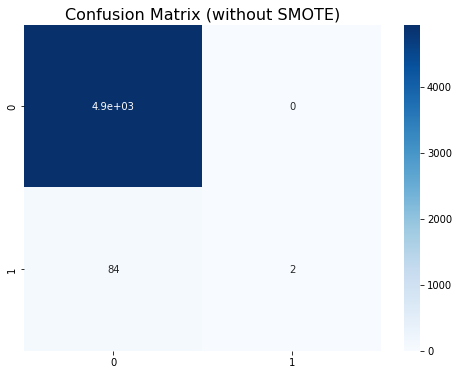

In [ ]:
model_lr=LogisticRegression(C= 0.001, fit_intercept=True, penalty='none', solver='newton-cg')
model_lr.fit(X_train, y_train)
pred_lr= search.predict(X_test)

# Evaluate
print(f'Accuracy = {accuracy_score(y_test, pred_lr):.2f}\nRecall = {recall_score(y_test, pred_lr):.2f}\n')
cm = confusion_matrix(y_test, pred_lr)
plt.figure(figsize=(8, 6))
plt.title('Confusion Matrix (without SMOTE)', size=16)
sns.heatmap(cm, annot=True, cmap='Blues');

**Le modèle de régression logistique est précis à 98 %**, alors où est le problème ? Oui, il peut classer correctement presque toutes les transactions authentiques. Mais il a également **classé 98% des transactions frauduleuses comme authentiques**. En un mot, le modèle est inutilisable. Le déséquilibre des classes a tué sa performance. **SMOTE** peut nous aider.

In [ ]:
from imblearn.over_sampling import SMOTE 

sm = SMOTE(random_state=42)

X_sm, y_sm = sm.fit_resample(X, y)

print(f'''Shape of X before SMOTE: {X.shape}
Shape of X after SMOTE: {X_sm.shape}''')

print('\nBalance of positive and negative classes (%):')
y_sm.value_counts(normalize=True) * 100

Shape of X before SMOTE: (25134, 20)
Shape of X after SMOTE: (49424, 20)

Balance of positive and negative classes (%):


1    50.0
0    50.0
Name: TARGET, dtype: float64

/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_logistic.py:1484: UserWarning: Setting penalty='none' will ignore the C and l1_ratio parameters
  "Setting penalty='none' will ignore the C and l1_ratio parameters"


Accuracy = 0.65
Recall = 0.66



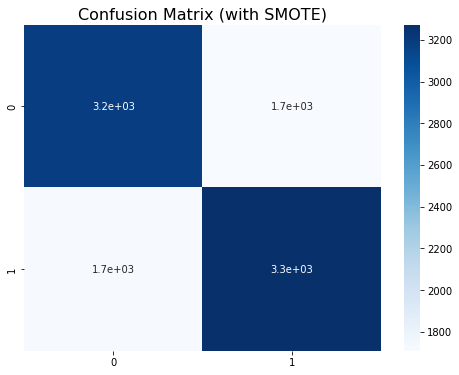

In [ ]:
X_train_s, X_test_s, y_train_s, y_test_s = train_test_split(
    X_sm, y_sm, test_size=0.2, random_state=42
)
model_lr_s=LogisticRegression(C= 0.001, fit_intercept=False, penalty='none', solver='newton-cg')
model_lr_s.fit(X_train_s, y_train_s)
pred_s= model_lr_s.predict(X_test_s)

# Evaluate
print(f'Accuracy = {accuracy_score(y_test_s, pred_s):.2f}\nRecall = {recall_score(y_test_s, pred_s):.2f}\n')
cm = confusion_matrix(y_test_s, pred_s)
plt.figure(figsize=(8, 6))
plt.title('Confusion Matrix (with SMOTE)', size=16)
sns.heatmap(cm, annot=True, cmap='Blues')

On constate qu'après le smote la précision du modèle 1 a diminué mais son **Rappel est passé de 2% à 66%**.

**FORETS** **ALEATOIRES**



*   **n_estimators** = nombre d'arbres dans la forêt
*   **max_features** = nombre maximum d'entités prises en compte pour diviser un nœud

*   **max_depth**= nombre maximum de niveaux dans chaque arbre de décision










In [ ]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, recall_score, confusion_matrix

rfc=RandomForestClassifier(random_state=42)
param_grid = { 
    'n_estimators': [200, 500],
    'max_features': ['auto', 'sqrt', 'log2'],
    'max_depth' : [4,5,6,7,8],
    'criterion' :['gini', 'entropy']
}
CV_rfc = GridSearchCV(estimator=rfc, param_grid=param_grid, cv= 5)
CV_rfc.fit(X_train, y_train)
CV_rfc.best_params_
CV_rfc.best_estimator_

RandomForestClassifier(max_depth=5, n_estimators=200, random_state=42)

Accuracy = 0.98
Recall = 0.02



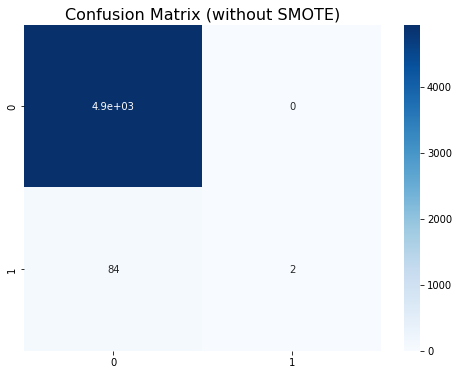

In [ ]:
model2 = RandomForestClassifier(max_depth=5, n_estimators=200, random_state=42)
model2.fit(X_train, y_train)
pred= model2.predict(X_test)

# Evaluate
print(f'Accuracy = {accuracy_score(y_test, pred):.2f}\nRecall = {recall_score(y_test, pred):.2f}\n')
cm = confusion_matrix(y_test, pred)
plt.figure(figsize=(8, 6))
plt.title('Confusion Matrix (without SMOTE)', size=16)
sns.heatmap(cm, annot=True, cmap='Blues');

Le modèle 2 est précis à **98 %**. Mais il a également classé **98%** des transactions frauduleuses comme authentiques. Ainsi, le modèle 2 n'est pas performant.

Accuracy = 0.99
Recall = 0.99



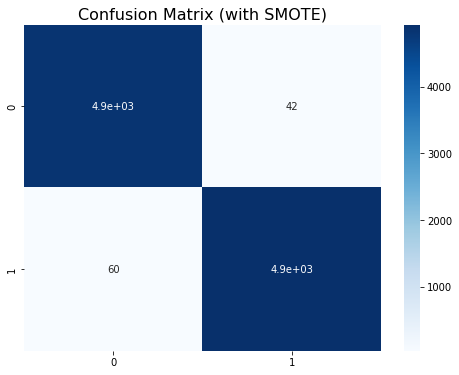

In [ ]:
model2_s = RandomForestClassifier(random_state=42)
model2_s.fit(X_train_s, y_train_s)
pred2_s = model2_s.predict(X_test_s)

print(f'Accuracy = {accuracy_score(y_test_s, pred2_s):.2f}\nRecall = {recall_score(y_test_s, pred2_s):.2f}\n')
cm = confusion_matrix(y_test_s, pred2_s)
plt.figure(figsize=(8, 6))
plt.title('Confusion Matrix (with SMOTE)', size=16)
sns.heatmap(cm, annot=True, cmap='Blues');

Le Random forest résultant du smote est très performant. SMOTE a fait son travail, et il en a résulté un modèle qui a nettement surpassé sa version précédente.
**Un modèle presque parfait.**

**SVM**

In [ ]:
from sklearn import svm
param_grid = {'C': [0.1,1, 10, 100], 'gamma': [1,0.1,0.01,0.001],'kernel': ['rbf', 'poly', 'sigmoid','linear']}
grid = GridSearchCV(svm.SVC(),param_grid,refit=True,verbose=2)
grid.fit(X_train,y_train)
# print best parameter after tuning
print(grid.best_params_)
 
# print how our model looks after hyper-parameter tuning
print(grid.best_estimator_)

Fitting 5 folds for each of 64 candidates, totalling 320 fits
[CV] END .........................C=0.1, gamma=1, kernel=rbf; total time=   1.7s
[CV] END .........................C=0.1, gamma=1, kernel=rbf; total time=   1.7s
[CV] END .........................C=0.1, gamma=1, kernel=rbf; total time=   1.6s
[CV] END .........................C=0.1, gamma=1, kernel=rbf; total time=   1.7s
[CV] END .........................C=0.1, gamma=1, kernel=rbf; total time=   1.7s
[CV] END ........................C=0.1, gamma=1, kernel=poly; total time=   5.5s
[CV] END ........................C=0.1, gamma=1, kernel=poly; total time=   5.9s
[CV] END ........................C=0.1, gamma=1, kernel=poly; total time=   6.5s
[CV] END ........................C=0.1, gamma=1, kernel=poly; total time=   5.9s
[CV] END ........................C=0.1, gamma=1, kernel=poly; total time=   5.8s
[CV] END .....................C=0.1, gamma=1, kernel=sigmoid; total time=   0.9s
[CV] END .....................C=0.1, gamma=1, k

Accuracy = 0.98
Recall = 0.02



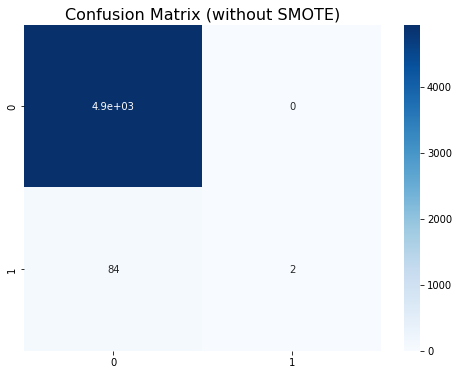

In [ ]:
grid_predictions = grid.predict(X_test)
# Evaluate
print(f'Accuracy = {accuracy_score(y_test, grid_predictions):.2f}\nRecall = {recall_score(y_test, grid_predictions):.2f}\n')
cm = confusion_matrix(y_test, grid_predictions)
plt.figure(figsize=(8, 6))
plt.title('Confusion Matrix (without SMOTE)', size=16)
sns.heatmap(cm, annot=True, cmap='Blues');

Accuracy = 0.76
Recall = 0.86



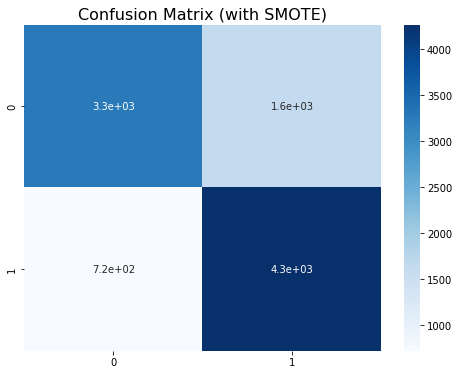

In [ ]:
model3_s = svm.SVC()
model3_s.fit(X_train_s, y_train_s)
pred3_s = model3_s.predict(X_test_s)

print(f'Accuracy = {accuracy_score(y_test_s, pred3_s):.2f}\nRecall = {recall_score(y_test_s, pred3_s):.2f}\n')
cm = confusion_matrix(y_test_s, pred3_s)
plt.figure(figsize=(8, 6))
plt.title('Confusion Matrix (with SMOTE)', size=16)
sns.heatmap(cm, annot=True, cmap='Blues');

On voit qu'après le SMOTE,la précision du modèle SVM s'est dégradée tandis que son Recall a augmenté.

**ARBRE DE DECISION**

Accuracy = 0.97
Recall = 0.15



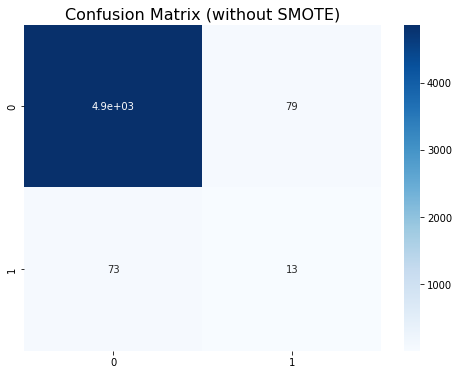

In [ ]:
from sklearn.tree import DecisionTreeClassifier
model4 = DecisionTreeClassifier()
model4.fit(X_train, y_train)
pred4 = model4.predict(X_test)

# Evaluate
print(f'Accuracy = {accuracy_score(y_test, pred4):.2f}\nRecall = {recall_score(y_test, pred4):.2f}\n')
cm = confusion_matrix(y_test, pred4)
plt.figure(figsize=(8, 6))
plt.title('Confusion Matrix (without SMOTE)', size=16)
sns.heatmap(cm, annot=True, cmap='Blues');

Accuracy = 0.97
Recall = 0.97



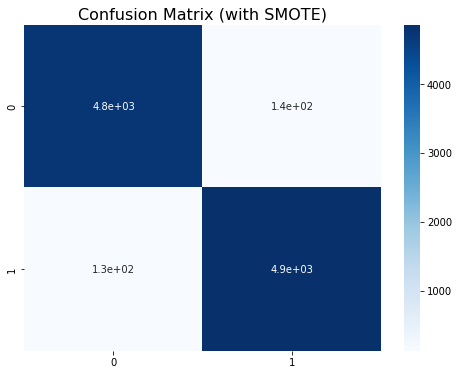

In [ ]:
model4_s = DecisionTreeClassifier()
model4_s.fit(X_train_s, y_train_s)
pred4_s = model4_s.predict(X_test_s)

print(f'Accuracy = {accuracy_score(y_test_s, pred4_s):.2f}\nRecall = {recall_score(y_test_s, pred4_s):.2f}\n')
cm = confusion_matrix(y_test_s, pred4_s)
plt.figure(figsize=(8, 6))
plt.title('Confusion Matrix (with SMOTE)', size=16)
sns.heatmap(cm, annot=True, cmap='Blues');

L'arbre de décision conserve sa précision et augmente son rappel après le smote.

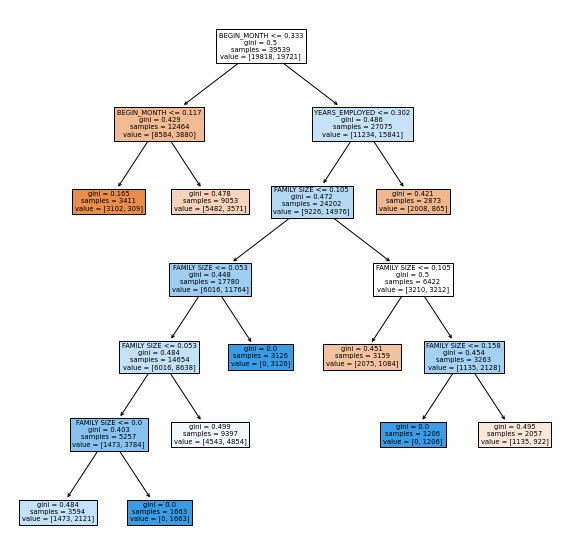

In [ ]:
from sklearn.tree import plot_tree
model_d=DecisionTreeClassifier(min_samples_split=30,min_samples_leaf=10,max_leaf_nodes=10,criterion='gini')
model_d.fit(X_train_s, y_train_s)
plt.figure(figsize=(10,10))
plot_tree(model_d,feature_names = list(X.columns),filled=True)
plt.show()

Voici l'arbre de décision.


*   L’arbre est composé de 7 feuilles
*   Nous observons l’effectif de l’échantillon d’apprentissage(39539) sur la racine de l’arbre dont 19818 pour"0" et 19721 pour"1";


*   Ici,
visiblement, le bleu est dévolu à ‘’1’’, l’orange à ‘’0’’







*   **min_samples_split** = nombre minimum de points de données placés dans un nœud avant que le nœud ne soit divisé

*   **min_samples_leaf** = nombre minimum de points de données autorisés dans un nœud feuille



**Analyse discriminante**



*   **svd** : Décomposition de la valeur singulière (par défaut). Ne calcule pas la matrice de covariance, ce solveur est donc recommandé pour les données avec un grand nombre de caractéristiques.

*   **lsqr** : solution des moindres carrés. Peut être combiné avec un estimateur de retrait ou de covariance personnalisé.


*   **eigen** : décomposition des valeurs propres. Peut être combiné avec un estimateur de retrait ou de covariance personnalisé.

*   List item
*   List item





In [ ]:
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
model = LinearDiscriminantAnalysis()
cv = RepeatedStratifiedKFold(n_splits=10, n_repeats=3, random_state=1)
# define grid
grid = dict()
grid['solver'] = ['svd', 'lsqr', 'eigen']
# define search
search = GridSearchCV(model, grid, scoring='accuracy', cv=cv, n_jobs=-1)
# perform the search
results = search.fit(X_train, y_train)
# summarize
print('Mean Accuracy: %.3f' % results.best_score_)
print('Config: %s' % results.best_params_)

Mean Accuracy: 0.984
Config: {'solver': 'svd'}


Accuracy = 0.98
Recall = 0.02



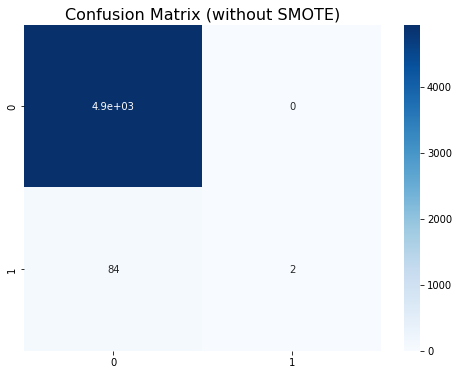

In [ ]:
preds = search.predict(X_test)

# Evaluate
print(f'Accuracy = {accuracy_score(y_test, preds):.2f}\nRecall = {recall_score(y_test, preds):.2f}\n')
cm = confusion_matrix(y_test, preds)
plt.figure(figsize=(8, 6))
plt.title('Confusion Matrix (without SMOTE)', size=16)
sns.heatmap(cm, annot=True, cmap='Blues');

Accuracy = 0.65
Recall = 0.66



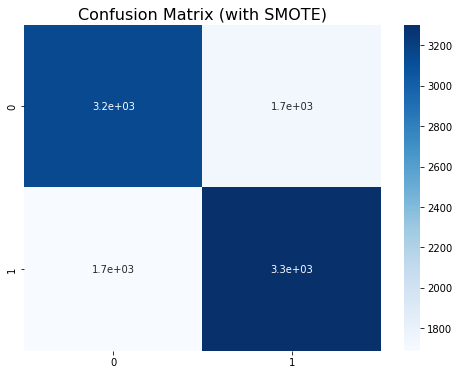

In [ ]:
model5_s= LinearDiscriminantAnalysis(solver="eigen")
model5_s.fit(X_train_s, y_train_s)
pred5_s = model5_s.predict(X_test_s)

print(f'Accuracy = {accuracy_score(y_test_s, pred5_s):.2f}\nRecall = {recall_score(y_test_s, pred5_s):.2f}\n')
cm = confusion_matrix(y_test_s, pred5_s)
plt.figure(figsize=(8, 6))
plt.title('Confusion Matrix (with SMOTE)', size=16)
sns.heatmap(cm, annot=True, cmap='Blues');



*   **tol**:
Seuil absolu pour qu'une valeur singulière de X soit considérée comme significative, utilisé pour estimer le rang de X. Les dimensions dont les valeurs singulières ne sont pas significatives sont rejetées. Uniquement utilisé si le solveur est 'svd'.
*   **store_covariance**:
Si True, calcule explicitement la matrice de covariance intra-classe pondérée lorsque le solveur est 'svd'. La matrice est toujours calculée et stockée pour les autres solveurs.

*   **reg_param**:
Régularise les estimations de covariance par classe






**QDA**

In [ ]:
from sklearn.discriminant_analysis import QuadraticDiscriminantAnalysis
model6 = QuadraticDiscriminantAnalysis()
parameters_3 = {
    'reg_param': (0.00001, 0.0001, 0.001,0.01, 0.1), 
    'store_covariance': (True, False),
    'tol': (0.0001, 0.001,0.01, 0.1), 
                   }
# with GridSearch
grid_search_qda = GridSearchCV(
    estimator=model6,
    param_grid=parameters_3,
    scoring = 'accuracy',
    n_jobs = -1,
    cv = 5
)
qda=grid_search_qda.fit(X_train, y_train)
# summarize
print('Mean Accuracy: %.3f' % qda.best_score_)
print('Config: %s' % qda.best_params_)


Mean Accuracy: 0.983
Config: {'reg_param': 0.1, 'store_covariance': True, 'tol': 0.0001}


/usr/local/lib/python3.7/dist-packages/sklearn/discriminant_analysis.py:878: UserWarning: Variables are collinear
  warnings.warn("Variables are collinear")


Accuracy = 0.98
Recall = 0.00



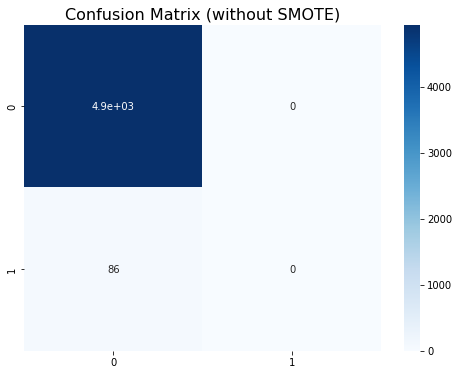

In [ ]:
qda_pred = grid_search_qda.predict(X_test)

# Evaluate
print(f'Accuracy = {accuracy_score(y_test, qda_pred):.2f}\nRecall = {recall_score(y_test, qda_pred):.2f}\n')
cm = confusion_matrix(y_test, qda_pred)
plt.figure(figsize=(8, 6))
plt.title('Confusion Matrix (without SMOTE)', size=16)
sns.heatmap(cm, annot=True, cmap='Blues');

/usr/local/lib/python3.7/dist-packages/sklearn/discriminant_analysis.py:878: UserWarning: Variables are collinear
  warnings.warn("Variables are collinear")


Accuracy = 0.63
Recall = 0.87



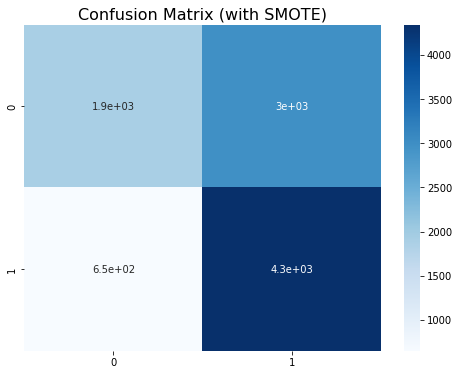

In [ ]:
model6_s= QuadraticDiscriminantAnalysis(reg_param=0.1, store_covariance=True, tol= 0.0001)
model6_s.fit(X_train_s, y_train_s)
pred6_s = model6_s.predict(X_test_s)

print(f'Accuracy = {accuracy_score(y_test_s, pred6_s):.2f}\nRecall = {recall_score(y_test_s, pred6_s):.2f}\n')
cm = confusion_matrix(y_test_s, pred6_s)
plt.figure(figsize=(8, 6))
plt.title('Confusion Matrix (with SMOTE)', size=16)
sns.heatmap(cm, annot=True, cmap='Blues');

**XGBOOST**

>
C'est un modèle ensembliste qui utilise un ensemble de d'algorithmes simples pour donner de meilleur résultats.



Accuracy = 0.98
Recall = 0.02



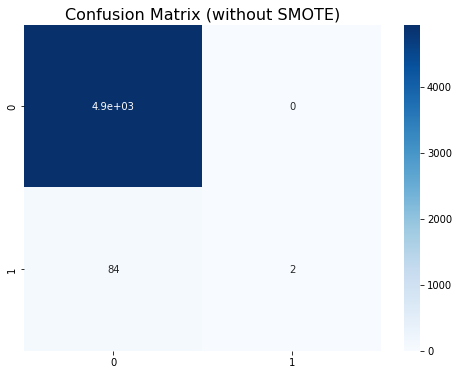

In [ ]:
import xgboost as xgb
model7 = xgb.XGBClassifier(random_state = 42)
model7.fit(X_train, y_train)
pred7 = model7.predict(X_test)

# Evaluate
print(f'Accuracy = {accuracy_score(y_test, pred7):.2f}\nRecall = {recall_score(y_test, pred7):.2f}\n')
cm = confusion_matrix(y_test, pred7)
plt.figure(figsize=(8, 6))
plt.title('Confusion Matrix (without SMOTE)', size=16)
sns.heatmap(cm, annot=True, cmap='Blues');

Accuracy = 0.63
Recall = 0.87



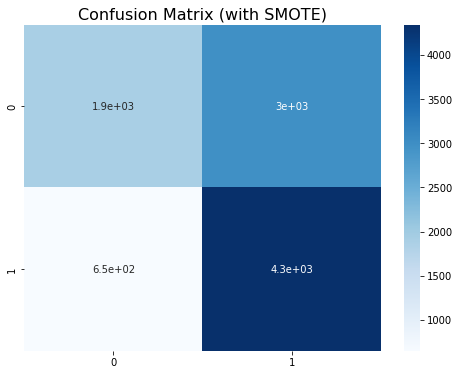

In [ ]:
model7_s= xgb.XGBClassifier(random_state = 42)
model7_s.fit(X_train_s, y_train_s)
pred7_s = model7_s.predict(X_test_s)

print(f'Accuracy = {accuracy_score(y_test_s, pred6_s):.2f}\nRecall = {recall_score(y_test_s, pred6_s):.2f}\n')
cm = confusion_matrix(y_test_s, pred6_s)
plt.figure(figsize=(8, 6))
plt.title('Confusion Matrix (with SMOTE)', size=16)
sns.heatmap(cm, annot=True, cmap='Blues');

In [ ]:
xgb_model = xgb.XGBClassifier()
parameters = {'nthread':[4], #when use hyperthread, xgboost may become slower
              'objective':['binary:logistic'],
              'learning_rate': [0.05], #so called `eta` value
              'max_depth': [6],
              'min_child_weight': [11],
              'silent': [1],
              'subsample': [0.8],
              'colsample_bytree': [0.7],
              'n_estimators': [5], #number of trees
              'missing':[-999],
              'seed': [1337]}
clf1 = GridSearchCV(xgb_model, parameters, n_jobs=5, 
                   cv=5, 
                   scoring='accuracy',
                   verbose=2, refit=True)
mod=clf1.fit(X_train, y_train)
# summarize
print('Mean Accuracy: %.3f' % mod.best_score_)
print('Config: %s' % mod.best_params_)

Fitting 5 folds for each of 1 candidates, totalling 5 fits
Mean Accuracy: 0.983
Config: {'colsample_bytree': 0.7, 'learning_rate': 0.05, 'max_depth': 6, 'min_child_weight': 11, 'missing': -999, 'n_estimators': 5, 'nthread': 4, 'objective': 'binary:logistic', 'seed': 1337, 'silent': 1, 'subsample': 0.8}


Accuracy = 0.98
Recall = 0.00



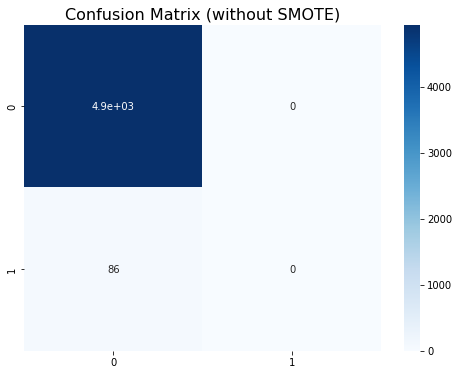

In [ ]:
predic = clf1.predict(X_test)

print(f'Accuracy = {accuracy_score(y_test, predic):.2f}\nRecall = {recall_score(y_test, predic):.2f}\n')
cm = confusion_matrix(y_test, predic)
plt.figure(figsize=(8, 6))
plt.title('Confusion Matrix (without SMOTE)', size=16)
sns.heatmap(cm, annot=True, cmap='Blues');

Le SMOTE a amélioré le modèle XGboost meme s'il a un peu perdu en précision.

En conclusion,**le meilleur modèle parmi les 7 utilisés est le RANDOM FOREST de par sa précision(99%) et son recall(99%).**
Calculons maitenant l'Aire sous la courbe de ROC(AUC).

AUC : 0.9988314683635284 


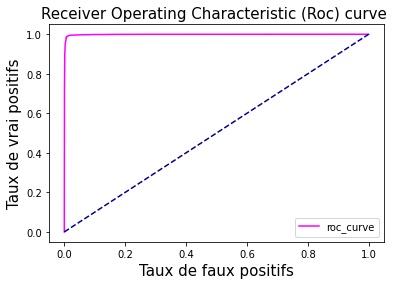

In [ ]:
from sklearn.metrics import roc_auc_score,roc_curve

ytest_pred=model2_s.predict_proba(X_test_s)
print("AUC : {} ".format(roc_auc_score(y_test_s,ytest_pred[:,-1])))
ytest_pred_ = ytest_pred[:,-1]

fpr,tpr,thresholds = roc_curve(y_test_s,ytest_pred_)

#plt.figure(figsize=(12,8))
plt.plot(fpr,tpr,label='roc_curve',color='MAGENTA')
plt.plot([0,1],[0,1],color='darkblue',linestyle='--')
plt.ylabel("Taux de vrai positifs",fontsize=15)
plt.xlabel("Taux de faux positifs",fontsize=15)
plt.title("Receiver Operating Characteristic (Roc) curve ",fontsize=15)
plt.legend()
plt.show()

L'**AUC** du Random forest est de **0.99** pour les données de test;ce qui montre que ce modèle est un classificateur très performant et presque parfait.



**CONCLUSION**

> 


La mise en œuvre de SMOTE sur notre ensemble de données déséquilibré nous a aidés avec le déséquilibre de nos étiquettes.

> 
Ainsi,SMOTE montre un résultat prometteur par rapport au rééchantillonnage aléatoire.


